<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [ ]:
!bash ./datasets/download_pix2pix_dataset.sh facades

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
!python train.py --dataroot ./datasets/shapes/final --name shapes_pix2pix --model pix2pix --direction AtoB --display_id -1 --gpu_ids -1 --n_epochs 5 --n_epochs_decay 5

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/shapes/final       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot ./datasets/shapes/final --direction AtoB --model pix2pix --name shapes_pix2pix --use_wandb --gpu_ids -1

# Visualize

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/shapes_pix2pix/test_latest/images/1_fake_B.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/shapes_pix2pix/test_latest/images/1_real_A.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/shapes_pix2pix/test_latest/images/1_real_B.png')
plt.imshow(img)
img

# Using the model

In [2]:
from options.test_options import TestOptions
from data import create_dataset
from models import create_model

import torch
import models

from models.networks import UnetGenerator

model = UnetGenerator()
model.load_state_dict(torch.load('checkpoints/shapes_pix2pix/latest_net_G.pth'))

# opt = TestOptions().parse(args_string='--dataroot ./datasets/shapes/final --direction AtoB --model pix2pix --name shapes_pix2pix --use_wandb --gpu_ids -1')
# hard-code some parameters for test
# opt.num_threads = 0   # test code only supports num_threads = 0
# opt.batch_size = 1    # test code only supports batch_size = 1
# opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
# opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
# opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
# dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
# model = create_model(opt)      # create a model given opt.model and other options
# model.setup(opt)               # regular setup:

# load the generator model
# model = models.find_model_using_name('pix2pix')
# model = torch.load('checkpoints/shapes_pix2pix/latest_net_G.pth')
# model.eval()

# img = plt.imread('datasets/shapes/A/test/1.png')


# model.set_input(img)  # unpack data from data loader
# model.test()           # run inference
# visuals = model.get_current_visuals()  # get image results
# img_path = model.get_image_paths()    

# plt.imshow(img)
# img


# plt.imshow(visuals)


TypeError: UnetGenerator.__init__() missing 3 required positional arguments: 'input_nc', 'output_nc', and 'num_downs'

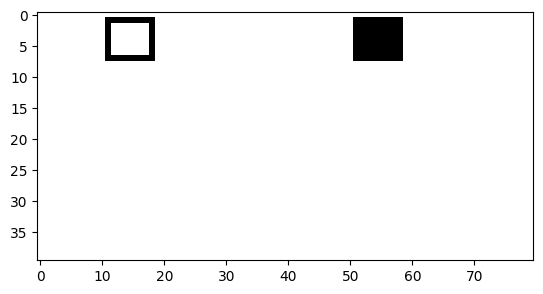

In [5]:
import matplotlib.pyplot as plt
img = plt.imread('datasets/shapes/final/train/1.png')
plt.imshow(img)


In [ ]:
import argparse
